https://machinelearningmastery.com/one-class-classification-algorithms/
    
    
The scikit-learn library provides a handful of common one-class classification algorithms intended for use in outlier or anomaly detection and change detection, such as One-Class SVM, Isolation Forest, Elliptic Envelope, and Local Outlier Factor.

We will devise a binary classification dataset to demonstrate the algorithms. We will use the make_classification() scikit-learn function to create 10,000 examples with 10 examples in the minority class and 9,990 in the majority class, or a 0.1 percent vs. 99.9 percent, or about 1:1000 class distribution.

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

Counter({0: 9990, 1: 10})


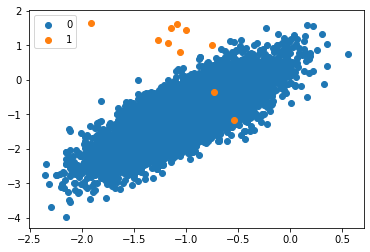

In [2]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

pyplot.legend()
pyplot.show()

This severe class imbalance with so few examples in the positive class and the unstructured nature of the few examples in the positive class might make a good basis for using one-class classification methods.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## One-Class Support Vector Machines

The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.

The scikit-learn library provides an implementation of one-class SVM in the OneClassSVM class.

The main difference from a standard SVM is that it is fit in an unsupervised manner and does not provide the normal hyperparameters for tuning the margin like C. Instead, it provides a hyperparameter “nu” that controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data, e.g. 0.01%.

In [5]:
from sklearn.svm import OneClassSVM

# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)

The model can be fit on all examples in the training dataset or just those examples in the majority class. Perhaps try both on your problem.

In this case, we will try fitting on just those examples in the training set that belong to the majority class.

In [6]:
# fit on majority class
model.fit(X_train[y_train==0])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.01, shrinking=True, tol=0.001, verbose=False)

Once fit, the model can be used to identify outliers in new data.

When calling the predict() function on the model, it will output a +1 for normal examples, so-called inliers, and a -1 for outliers.

    Inlier Prediction: +1
    Outlier Prediction: -1


In [7]:
# detect outliers in the test set
yhat = model.predict(X_test)

If we want to evaluate the performance of the model as a binary classifier, we must change the labels in the test dataset from 0 and 1 for the majority and minority classes respectively, to +1 and -1.

In [8]:
# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1

We can then compare the predictions from the model to the expected target values and calculate a score. Given that we have crisp class labels, we might use a score like precision, recall, or a combination of both, such as the F-measure (F1-score).

In this case, we will use F-measure score, which is the harmonic mean of precision and recall. We can calculate the F-measure using the f1_score() function and specify the label of the minority class as -1 via the “pos_label” argument.

In [9]:
from sklearn.metrics import f1_score

In [10]:
# calculate score
score = f1_score(y_test, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.154


In this case, an F1 score around 0.15 is achieved.